In [328]:
import pandas as pd
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [329]:
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [330]:
train_df.shape

(891, 12)

In [331]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [332]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [333]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [334]:
train_df.loc[train_df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


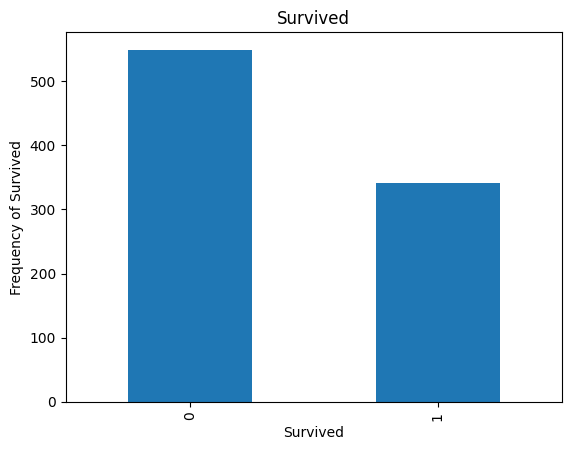

In [335]:

plt.subplot(1,1,1)
plt1 = train_df.Survived.value_counts().plot(kind = 'bar')
plt.title('Survived')
plt1.set(xlabel = 'Survived', ylabel='Frequency of Survived')

plt.show()

<AxesSubplot: xlabel='Pclass', ylabel='count'>

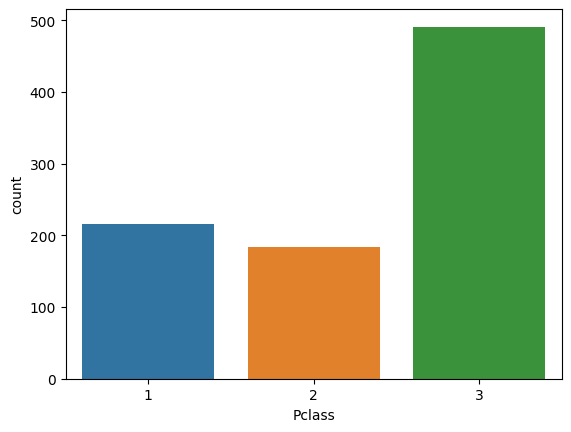

In [336]:
sns.countplot(x ='Pclass', data = train_df)

<AxesSubplot: xlabel='Sex', ylabel='count'>

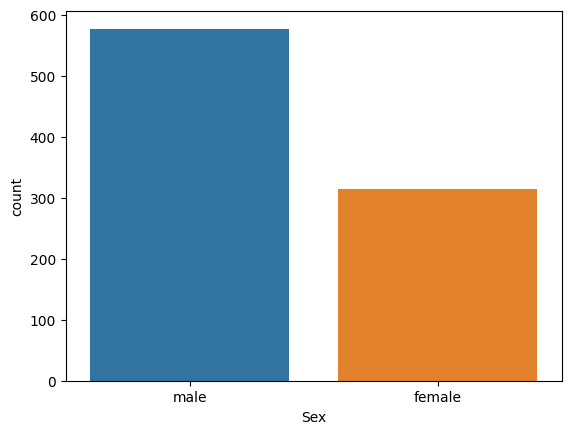

In [337]:
sns.countplot(x ='Sex', data = train_df)

<AxesSubplot: xlabel='Pclass', ylabel='Survived'>

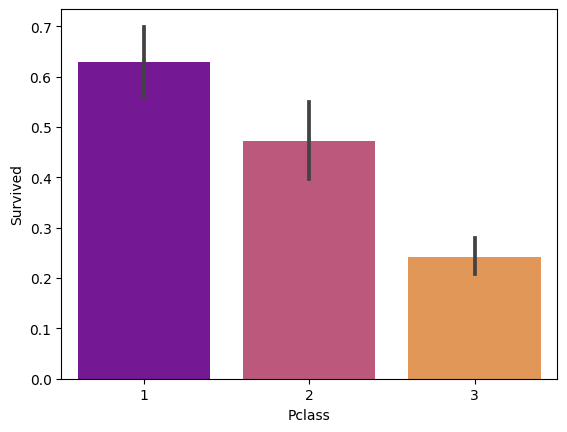

In [338]:
sns.barplot(x ='Pclass', y ='Survived', data = train_df, palette ='plasma')

<AxesSubplot: xlabel='Sex', ylabel='Age'>

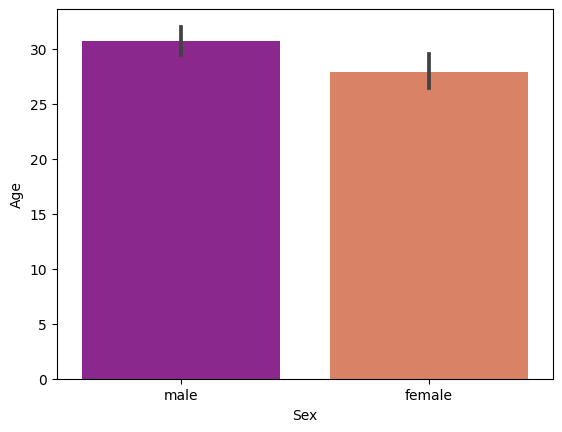

In [339]:
sns.barplot(x ='Sex', y ='Age', data = train_df, palette ='plasma')

<AxesSubplot: xlabel='Sex', ylabel='Survived'>

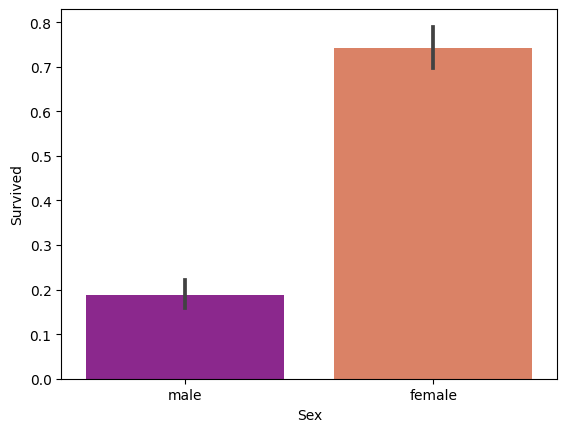

In [340]:
sns.barplot(x ='Sex', y ='Survived', data = train_df, palette ='plasma')

C:\Users\20nis\AppData\Local\Temp\ipykernel_18908\2004223593.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.Age)


<AxesSubplot: title={'center': 'Age Distribution Plot'}, xlabel='Age', ylabel='Density'>

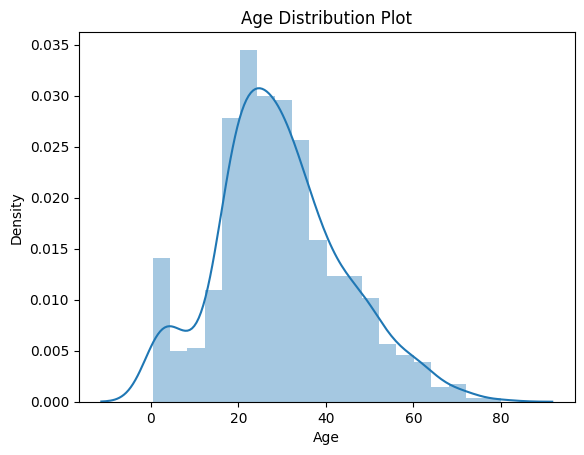

In [341]:

plt.title('Age Distribution Plot')
sns.distplot(train_df.Age)

In [342]:
train_df = train_df.drop(['Cabin'],1).drop(['Name'],1)
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())
train_df = train_df.dropna()
train_df.head(10)

C:\Users\20nis\AppData\Local\Temp\ipykernel_18908\2004036347.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train_df = train_df.drop(['Cabin'],1).drop(['Name'],1)
C:\Users\20nis\AppData\Local\Temp\ipykernel_18908\2004036347.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train_df = train_df.drop(['Cabin'],1).drop(['Name'],1)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.000000,1,0,113803,53.1000,S
4,5,0,3,male,35.000000,0,0,373450,8.0500,S
5,6,0,3,male,29.699118,0,0,330877,8.4583,Q
6,7,0,1,male,54.000000,0,0,17463,51.8625,S
7,8,0,3,male,2.000000,3,1,349909,21.0750,S
8,9,1,3,female,27.000000,0,2,347742,11.1333,S
9,10,1,2,female,14.000000,1,0,237736,30.0708,C


In [343]:
object_df = train_df.select_dtypes(include = ['object'])
num_df = train_df.select_dtypes(exclude = ['object'])
le = LabelEncoder()
for i in range(object_df.shape[1]):
    object_df.iloc[:,i] = le.fit_transform(object_df.iloc[:,i])
object_df

,Sex,Ticket,Embarked
0,1,522,2
1,0,595,0
2,0,668,2
3,0,48,2
4,1,471,2
...,...,...,...
886,1,100,2
887,0,14,2
888,0,674,2
889,1,8,0


In [344]:
num_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.000000,1,0,7.2500
1,2,1,1,38.000000,1,0,71.2833
2,3,1,3,26.000000,0,0,7.9250
3,4,1,1,35.000000,1,0,53.1000
4,5,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000
887,888,1,1,19.000000,0,0,30.0000
888,889,0,3,29.699118,1,2,23.4500
889,890,1,1,26.000000,0,0,30.0000


In [345]:
df = pd.concat([num_df,object_df],axis = 1)
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Ticket,Embarked
0,1,0,3,22.000000,1,0,7.2500,1,522,2
1,2,1,1,38.000000,1,0,71.2833,0,595,0
2,3,1,3,26.000000,0,0,7.9250,0,668,2
3,4,1,1,35.000000,1,0,53.1000,0,48,2
4,5,0,3,35.000000,0,0,8.0500,1,471,2
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,1,100,2
887,888,1,1,19.000000,0,0,30.0000,0,14,2
888,889,0,3,29.699118,1,2,23.4500,0,674,2
889,890,1,1,26.000000,0,0,30.0000,1,8,0


In [346]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex            0
Ticket         0
Embarked       0
dtype: int64

In [347]:
x = df[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Sex','Ticket','Embarked']].values
y = df['Survived'].values
print("Shape of x: ",x.shape)
print("Shape of y: ",y.shape)

Shape of x:  (889, 9)
Shape of y:  (889,)


In [348]:
y = pd.get_dummies(y).values
y

array([[1, 0],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]], dtype=uint8)

In [349]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.2,random_state = 4)
numfeatures = train_x.shape[1]
numLabels = train_y.shape[1]
train_x = tf.constant(train_x, dtype='float32')
train_y = tf.constant(train_y, dtype='float32')
test_x = tf.constant(test_x, dtype='float32')
test_y = tf.constant(test_y, dtype='float32')
W = tf.Variable(tf.zeros([9, 2]))  
b = tf.Variable(tf.zeros([2]))
weights = tf.Variable(tf.random.normal([numfeatures,numLabels],
                                       mean=0.,
                                       stddev=0.01,
                                       name="weights"),dtype='float32')


bias = tf.Variable(tf.random.normal([1,numLabels],
                                    mean=0.,
                                    stddev=0.01,
                                    name="bias"))

step 0, training accuracy 0.410112, loss 0.223021, change in loss 0.223021
step 10, training accuracy 0.522472, loss 0.19877, change in loss 0.024251
step 20, training accuracy 0.589888, loss 0.160054, change in loss 0.0387155
step 30, training accuracy 0.589888, loss 0.17988, change in loss 0.0198262
step 40, training accuracy 0.589888, loss 0.175569, change in loss 0.00431184
step 50, training accuracy 0.640449, loss 0.140457, change in loss 0.0351121
step 60, training accuracy 0.61236, loss 0.156628, change in loss 0.0161715
step 70, training accuracy 0.58427, loss 0.171881, change in loss 0.0152526
step 80, training accuracy 0.623595, loss 0.15528, change in loss 0.016601
step 90, training accuracy 0.589888, loss 0.174806, change in loss 0.0195268
step 100, training accuracy 0.674157, loss 0.13503, change in loss 0.0397763
step 110, training accuracy 0.589888, loss 0.177251, change in loss 0.0422206
step 120, training accuracy 0.617977, loss 0.151223, change in loss 0.0260273
step 

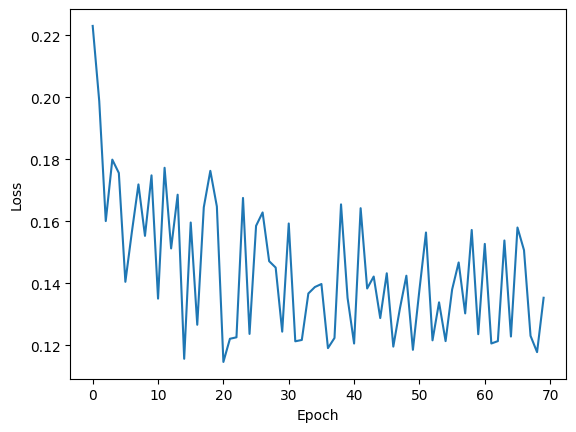

In [350]:

def logistic_regression(x):
    apply_weights_OP = tf.matmul(x, weights, name="apply_weights")
    add_bias_OP = tf.add(apply_weights_OP, bias, name="add_bias") 
    activation_OP = tf.nn.sigmoid(add_bias_OP, name="activation")
    return activation_OP
numEpochs = 700
learningRate = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.0008,
                                          decay_steps=train_x.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)
loss_object = tf.keras.losses.MeanSquaredLogarithmicError()
optimizer = tf.keras.optimizers.SGD(learningRate)
def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = logistic_regression(x)
        loss = loss_object(pred, y)
    gradients = g.gradient(loss, [weights, bias])
    optimizer.apply_gradients(zip(gradients, [weights, bias]))
    
# Initialize reporting variables
display_step = 10
epoch_values = []
accuracy_values = []
loss_values = []
loss = 0
diff = 1
# Training epochs
for i in range(numEpochs):
    if i > 1 and diff < .0001:
        print("change in loss %g; convergence."%diff)
        break
    else:
        # Run training step
        run_optimization(train_x, train_y)
        
        # Report occasional stats
        if i % display_step == 0:
            # Add epoch to epoch_values
            epoch_values.append(i)
            
            pred = logistic_regression(test_x)

            newLoss = loss_object(pred, test_y)
            # Add loss to live graphing variable
            loss_values.append(newLoss)
            
            # Generate accuracy stats on test data
            acc = accuracy(pred, test_y)
            accuracy_values.append(acc)
            
    
            # Re-assign values for variables
            diff = abs(newLoss - loss)
            loss = newLoss

            #generate print statements
            print("step %d, training accuracy %g, loss %g, change in loss %g"%(i, acc, newLoss, diff))

        

          

# How well do we perform on held-out test data?
print("final accuracy on test set: %s" %acc.numpy())

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(loss_values)
plt.show()